Q1: Download the following dataset diabetes.csv - Google Drive.

a) Find the optimum number of principal components for the features in the above-mentioned data.

b) Use any two classification models of your choice and find the prediction accuracy and error between the reduced data (with an optimum number of principal components) and the complete data.

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset from google Drive
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:


# Data Preparation :- through which we can check null and features

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA and get explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

opt_components = np.argmax(explained_variance >= 0.95) + 1

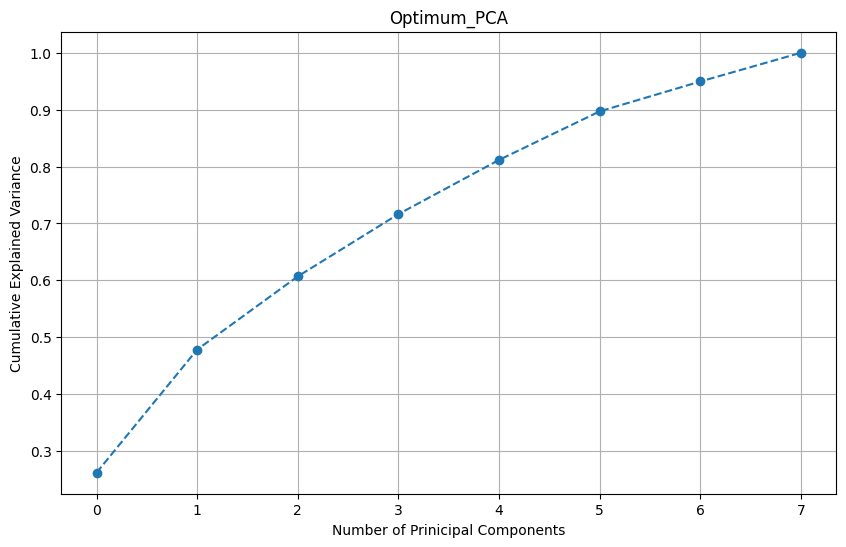

In [6]:
# a) Find the optimum number of principal components for the features in the above-mentioned data.

pca =PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Prinicipal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Optimum_PCA')
plt.grid(True)
plt.show()

In [7]:
#b) Use any two classification models of your choice and find the prediction accuracy and error between the reduced data (with an optimum number of principal components) and the complete data.
# selecting two model - Logistic Regression and Random forest

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic regression on Dibetic data

Logistic_reg = LogisticRegression()
Logistic_reg.fit(X_train, y_train)
y_pred = Logistic_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred)
print("Accuracy with Logistic Regression:", accuracy_log_reg)

# Random Forest on Dibetic data

ran_forest = RandomForestClassifier()
ran_forest.fit(X_train, y_train)
y_pred_rnf = ran_forest.predict(X_test)
accuracy_ran_forest = accuracy_score(y_test, y_pred_rnf)
print("Accuracy with Random Forest:", accuracy_ran_forest)


Accuracy with Logistic Regression: 0.7532467532467533
Accuracy with Random Forest: 0.7402597402597403


In [8]:
# Check accuracy with PCA reduce data

pca = PCA(n_components= 6)
X_pca_reduced = pca.fit_transform(X_scaled)

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# logistic regression on the reduced data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_reduced, y_train)
y_pred_log_pca = log_reg_pca.predict(X_test_reduced)
accuracy_log_reg_pca = accuracy_score(y_test, y_pred_log_pca)

# Random forest on reduced data
ran_forest_pca = RandomForestClassifier()
ran_forest_pca.fit(X_train_reduced, y_train)
y_pred_rnf_pca = ran_forest_pca.predict(X_test_reduced)
accuracy_ran_forest_pca = accuracy_score(y_test, y_pred_rnf_pca)

print("Accuracy with Logistic Regression (PCA):", accuracy_log_reg_pca)
print("Accuracy with Random Forest (PCA):", accuracy_ran_forest_pca)

Accuracy with Logistic Regression (PCA): 0.7727272727272727
Accuracy with Random Forest (PCA): 0.7012987012987013


In [9]:
print("Optimal Principal Components:", opt_components)
print("Logistic Regression - Original Data Accuracy:", accuracy_log_reg)
print("Logistic Regression - PCA Reduced Accuracy  :", accuracy_log_reg_pca)

print("Random Forest - Original Data Accuracy      :", accuracy_ran_forest)
print("Random Forest - PCA Reduced Accuracy        :", accuracy_ran_forest_pca)

print("Logistic Regression - Accuracy Drop         :", accuracy_log_reg - accuracy_log_reg_pca)
print("Random Forest - Accuracy Drop               :", accuracy_ran_forest - accuracy_ran_forest_pca)


Optimal Principal Components: 8
Logistic Regression - Original Data Accuracy: 0.7532467532467533
Logistic Regression - PCA Reduced Accuracy  : 0.7727272727272727
Random Forest - Original Data Accuracy      : 0.7402597402597403
Random Forest - PCA Reduced Accuracy        : 0.7012987012987013
Logistic Regression - Accuracy Drop         : -0.01948051948051943
Random Forest - Accuracy Drop               : 0.038961038961038974
